<a href="https://colab.research.google.com/github/nabeelnazeer/MachineLearningAndParallel_Lab/blob/main/ldapcatsne_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Case 1: Reduction to 2 features


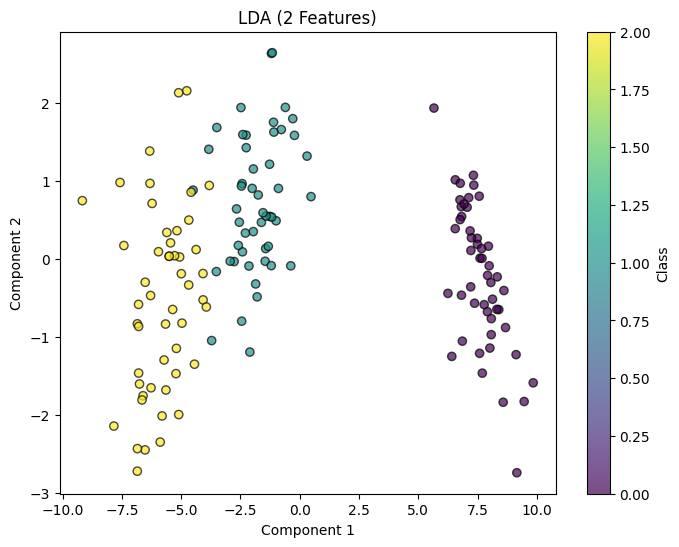

LDA: Mean Accuracy = 0.9733, Std = 0.0389


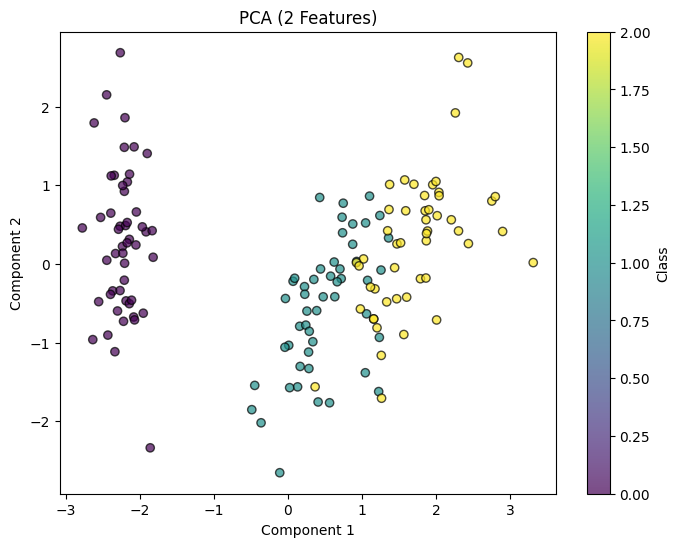

PCA: Mean Accuracy = 0.8800, Std = 0.0859


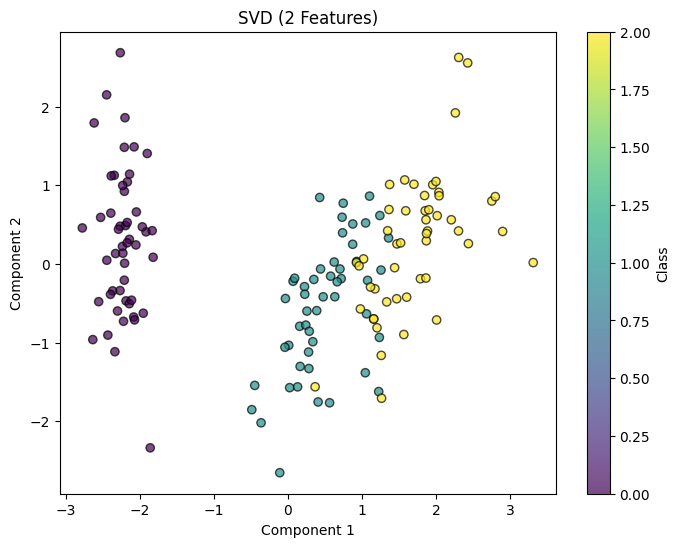

SVD: Mean Accuracy = 0.8800, Std = 0.0859


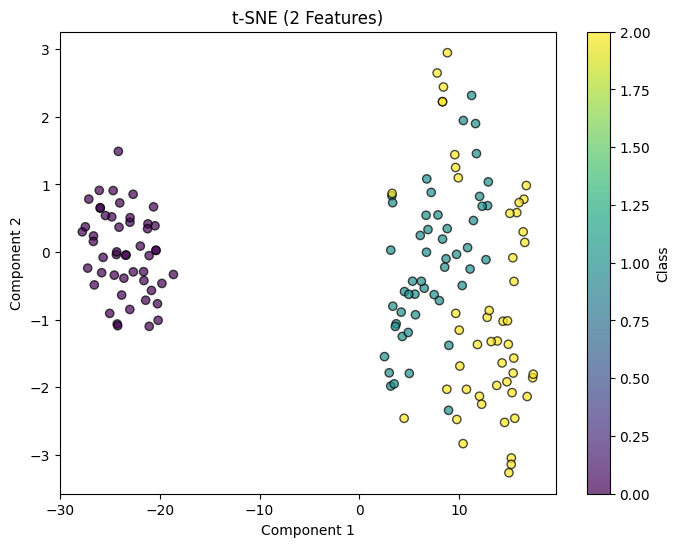

t-SNE: Mean Accuracy = 0.9200, Std = 0.0806

Case 2: Reduction to 3 features
LDA: Skipping (n_components > max allowed)


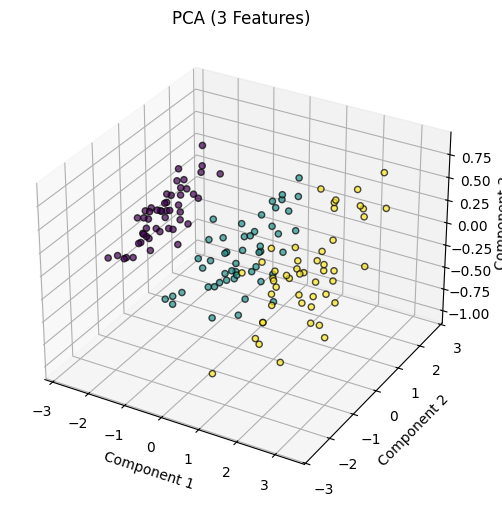

PCA: Mean Accuracy = 0.9333, Std = 0.0699


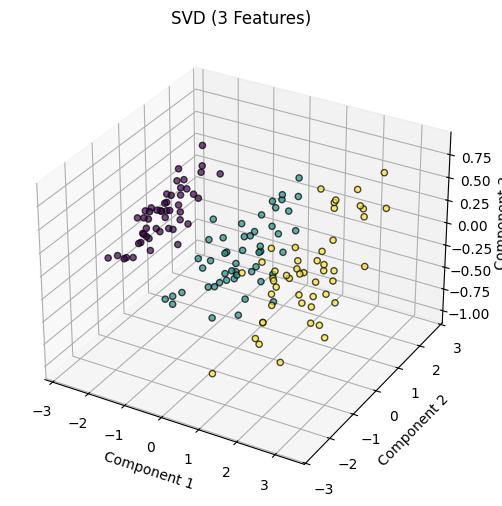

SVD: Mean Accuracy = 0.9333, Std = 0.0699
t-SNE: Mean Accuracy = 0.8800, Std = 0.0267

Cross-Validation Accuracy for Different Feature Reduction Methods:

       2 Features  3 Features
LDA      0.973333         NaN
PCA      0.880000    0.933333
SVD      0.880000    0.933333
t-SNE    0.920000    0.880000


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to apply LDA (with class constraints)
def apply_lda(X, y, n_components):
    max_components = min(X.shape[1], len(np.unique(y)) - 1)
    if n_components > max_components:
        return None
    lda = LDA(n_components=n_components)
    return lda.fit_transform(X, y)

# Function to apply other dimensionality reduction techniques
def apply_pca(X, n_components):
    return PCA(n_components=n_components).fit_transform(X)

def apply_svd(X, n_components):
    return TruncatedSVD(n_components=n_components).fit_transform(X)

def apply_tsne(X, n_components):
    return TSNE(n_components=n_components, random_state=42).fit_transform(X)

# Function to perform cross-validation
def perform_cross_validation(X_transformed, y):
    clf = RandomForestClassifier(random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_transformed, y, cv=cv, scoring='accuracy')
    return np.mean(scores), np.std(scores)

# Function to plot 2D scatter plots
def plot_2d(X_transformed, y, title):
    plt.figure(figsize=(8,6))
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.colorbar(label='Class')
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

# Function to plot 3D scatter plots
def plot_3d(X_transformed, y, title):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    plt.show()

# Store accuracy results
results = {}

# Case 1: Reduce to 2 features
print("Case 1: Reduction to 2 features")
for method, func in [("LDA", apply_lda), ("PCA", apply_pca), ("SVD", apply_svd), ("t-SNE", apply_tsne)]:
    if method == "LDA" and 2 > min(X.shape[1], len(np.unique(y)) - 1):
        print(f"{method}: Skipping (n_components > max allowed)")
        continue
    X_transformed = func(X_scaled, n_components=2) if method != "LDA" else func(X, y, n_components=2)
    mean_acc, std_acc = perform_cross_validation(X_transformed, y)
    results[method] = {"2 Features": mean_acc}

    # Plot 2D visualization
    plot_2d(X_transformed, y, f"{method} (2 Features)")

    print(f"{method}: Mean Accuracy = {mean_acc:.4f}, Std = {std_acc:.4f}")

# Case 2: Reduce to 3 features
print("\nCase 2: Reduction to 3 features")
for method, func in [("LDA", apply_lda), ("PCA", apply_pca), ("SVD", apply_svd), ("t-SNE", apply_tsne)]:
    if method == "LDA" and 3 > min(X.shape[1], len(np.unique(y)) - 1):
        print(f"{method}: Skipping (n_components > max allowed)")
        continue
    X_transformed = func(X_scaled, n_components=3) if method != "LDA" else func(X, y, n_components=3)
    mean_acc, std_acc = perform_cross_validation(X_transformed, y)
    results[method]["3 Features"] = mean_acc

    # Plot 3D visualization (only if method supports it)
    if method != "t-SNE":
        plot_3d(X_transformed, y, f"{method} (3 Features)")

    print(f"{method}: Mean Accuracy = {mean_acc:.4f}, Std = {std_acc:.4f}")

# Convert results to DataFrame and print
results_df = pd.DataFrame(results).T
print("\nCross-Validation Accuracy for Different Feature Reduction Methods:\n")
print(results_df)